In [1]:
from keras.utils import np_utils 
from keras.datasets import mnist 
import seaborn as sns
from keras.initializers import RandomNormal

Using TensorFlow backend.


In [2]:
#%matplotlib notebook
%matplotlib inline
%pylab inline
import matplotlib.pyplot as plt
import numpy as np
import time
# https://gist.github.com/greydanus/f6eee59eaf1d90fcb3b534a25362cea4
# https://stackoverflow.com/a/14434334
# this function is used to update the plots for each epoch and error
def plt_dynamic(x, vy, ty, ax, colors=['b']):
    ax.plot(x, vy, 'b', label="Validation Loss")
    ax.plot(x, ty, 'r', label="Train Loss")
    plt.legend()
    plt.grid()
    fig.canvas.draw()

Populating the interactive namespace from numpy and matplotlib


# IMPORTING AND DIVING INTO THE DATASET

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


In [4]:
print("Number of training examples :", X_train.shape[0], "and each image is of shape (%d, %d)"%(X_train.shape[1], X_train.shape[2]))
print("Number of training examples :", X_test.shape[0], "and each image is of shape (%d, %d)"%(X_test.shape[1], X_test.shape[2]))

Number of training examples : 60000 and each image is of shape (28, 28)
Number of training examples : 10000 and each image is of shape (28, 28)


The output is 4


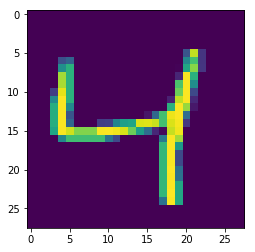

In [5]:
plt.imshow(X_train[2])
print("The output is",y_train[2])

In [0]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1]*X_train.shape[2]) 
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1]*X_test.shape[2]) 

In [7]:
print("Number of training examples :", X_train.shape[0], "and each image is of shape (%d)"%(X_train.shape[1]))
print("Number of training examples :", X_test.shape[0], "and each image is of shape (%d)"%(X_test.shape[1]))

Number of training examples : 60000 and each image is of shape (784)
Number of training examples : 10000 and each image is of shape (784)


In [0]:
X_train = X_train/255
X_test = X_test/255

In [9]:
# here we are having a class number for each image
print("Class label of first image :", y_train[0])

# lets convert this into a 10 dimensional vector
# ex: consider an image is 5 convert it into 5 => [0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
# this conversion needed for MLPs 

Y_train = np_utils.to_categorical(y_train, 10) 
Y_test = np_utils.to_categorical(y_test, 10)

print("After converting the output into a vector : ",Y_train[0])

Class label of first image : 5
After converting the output into a vector :  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [0]:
from keras.models import Sequential 
from keras.layers import Dense, Activation 

In [0]:
output_dim = 10
input_dim = X_train.shape[1]

batch_size = 128 
nb_epoch = 20

# MODEL 1 - 2 HIDDEN LAYERS

**1.1 RELU ACTIVATION**

In [0]:
model1 = Sequential()
model1.add(Dense(230, input_dim=input_dim, activation='relu'))
model1.add(Dense(100, input_dim=input_dim, activation='relu'))
model1.add(Dense(10, input_dim=input_dim, activation='softmax'))

W0822 15:13:09.473532 140115941365632 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0822 15:13:09.522732 140115941365632 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0822 15:13:09.530593 140115941365632 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



In [0]:
model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model1.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

W0822 15:13:14.105819 140115941365632 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0822 15:13:14.151415 140115941365632 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.

W0822 15:13:14.289976 140115941365632 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0822 15:13:14.354537 140115941365632 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 7s 116us/step - loss: 0.2841 - acc: 0.9194 - val_loss: 0.1420 - val_acc: 0.9564
Epoch 2/20
60000/60000 [==============================] - 3s 48us/step - loss: 0.1106 - acc: 0.9673 - val_loss: 0.0923 - val_acc: 0.9710
Epoch 3/20
60000/60000 [==============================] - 3s 49us/step - loss: 0.0713 - acc: 0.9783 - val_loss: 0.0827 - val_acc: 0.9735
Epoch 4/20
60000/60000 [==============================] - 3s 49us/step - loss: 0.0525 - acc: 0.9837 - val_loss: 0.0799 - val_acc: 0.9741
Epoch 5/20
60000/60000 [==============================] - 3s 50us/step - loss: 0.0382 - acc: 0.9885 - val_loss: 0.0801 - val_acc: 0.9764
Epoch 6/20
60000/60000 [==============================] - 3s 45us/step - loss: 0.0286 - acc: 0.9913 - val_loss: 0.0762 - val_acc: 0.9771
Epoch 7/20
60000/60000 [==============================] - 3s 45us/step - loss: 0.0231 - acc: 0.9926 - val_loss: 0.0733 - val_ac

In [0]:
model1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 230)               180550    
_________________________________________________________________
dense_2 (Dense)              (None, 100)               23100     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1010      
Total params: 204,660
Trainable params: 204,660
Non-trainable params: 0
_________________________________________________________________


Test score: 0.08070132349427932
Test accuracy: 0.9809


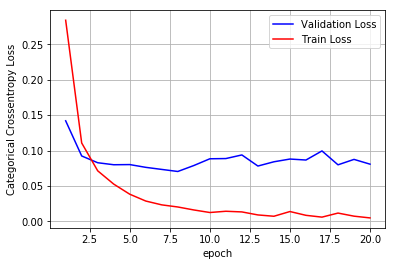

In [0]:
score = model1.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

The plot says that Validation loss is very high than training loss after 3 epochs

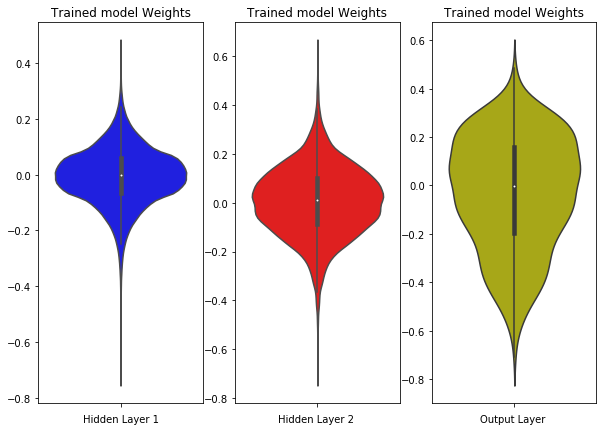

In [0]:
w_after = model1.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure(figsize=(10,7))
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

**1.2 MODEL WITH 2 POWERS AS NUMBER OF HIDDEN LAYERS (RELU ACTIVATION)**

In [0]:
model1 = Sequential()
model1.add(Dense(256, input_dim=input_dim, activation='relu'))
model1.add(Dense(128, input_dim=input_dim, activation='relu'))
model1.add(Dense(10, input_dim=input_dim, activation='softmax'))

In [0]:
model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model1.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 3s 51us/step - loss: 0.2706 - acc: 0.9233 - val_loss: 0.1266 - val_acc: 0.9618
Epoch 2/20
60000/60000 [==============================] - 3s 45us/step - loss: 0.1033 - acc: 0.9690 - val_loss: 0.0958 - val_acc: 0.9689
Epoch 3/20
60000/60000 [==============================] - 3s 47us/step - loss: 0.0681 - acc: 0.9796 - val_loss: 0.0765 - val_acc: 0.9755
Epoch 4/20
60000/60000 [==============================] - 3s 45us/step - loss: 0.0479 - acc: 0.9853 - val_loss: 0.0738 - val_acc: 0.9760
Epoch 5/20
60000/60000 [==============================] - 3s 47us/step - loss: 0.0362 - acc: 0.9885 - val_loss: 0.0722 - val_acc: 0.9778
Epoch 6/20
60000/60000 [==============================] - 3s 45us/step - loss: 0.0280 - acc: 0.9912 - val_loss: 0.0737 - val_acc: 0.9783
Epoch 7/20
60000/60000 [==============================] - 3s 46us/step - loss: 0.0204 - acc: 0.9937 - val_loss: 0.0681 - val_acc

In [0]:
model1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_5 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_6 (Dense)              (None, 10)                1290      
Total params: 235,146
Trainable params: 235,146
Non-trainable params: 0
_________________________________________________________________


Test score: 0.09506374017388317
Test accuracy: 0.9802


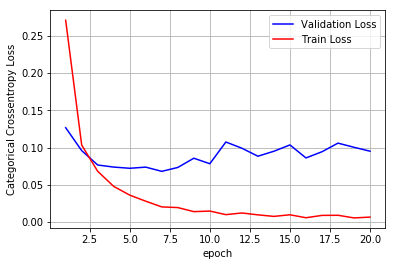

In [0]:
score = model1.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

The model overfits as the number of epochs increased.

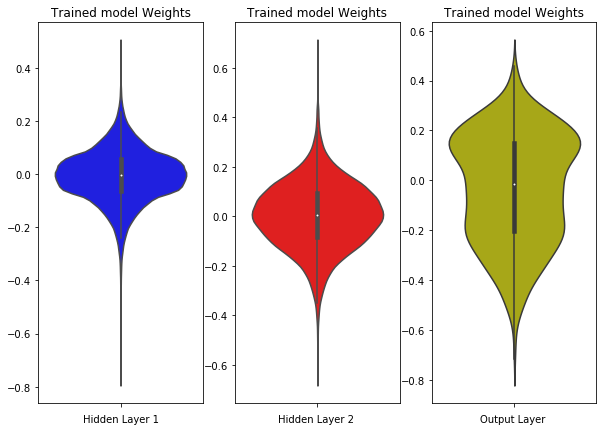

In [0]:
w_after = model1.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure(figsize=(10,7))
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

**1.3 RELU ACTIVATION WITH DROPOUT VALUE 0.5**

In [0]:
from keras.layers import Dropout
model1 = Sequential()
model1.add(Dense(256, input_dim=input_dim, activation='relu'))
model1.add(Dropout(0.5))
model1.add(Dense(128, input_dim=input_dim, activation='relu'))
model1.add(Dropout(0.5))
model1.add(Dense(10, input_dim=input_dim, activation='softmax'))

W0822 15:32:48.802173 140115941365632 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3445: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [0]:
model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model1.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 3s 53us/step - loss: 0.5257 - acc: 0.8390 - val_loss: 0.1702 - val_acc: 0.9497
Epoch 2/20
60000/60000 [==============================] - 3s 49us/step - loss: 0.2422 - acc: 0.9304 - val_loss: 0.1223 - val_acc: 0.9646
Epoch 3/20
60000/60000 [==============================] - 3s 49us/step - loss: 0.1883 - acc: 0.9457 - val_loss: 0.1009 - val_acc: 0.9699
Epoch 4/20
60000/60000 [==============================] - 3s 49us/step - loss: 0.1653 - acc: 0.9517 - val_loss: 0.0946 - val_acc: 0.9704
Epoch 5/20
60000/60000 [==============================] - 3s 48us/step - loss: 0.1470 - acc: 0.9568 - val_loss: 0.0860 - val_acc: 0.9743
Epoch 6/20
60000/60000 [==============================] - 3s 49us/step - loss: 0.1327 - acc: 0.9614 - val_loss: 0.0816 - val_acc: 0.9741
Epoch 7/20
60000/60000 [==============================] - 3s 48us/step - loss: 0.1190 - acc: 0.9655 - val_loss: 0.0778 - val_acc

In [0]:
model1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 256)               200960    
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 128)               32896     
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 10)                1290      
Total params: 235,146
Trainable params: 235,146
Non-trainable params: 0
_________________________________________________________________


Test score: 0.06511110941658844
Test accuracy: 0.9817


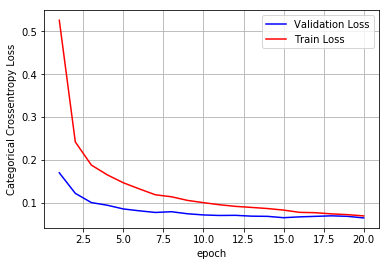

In [0]:
score = model1.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

This is so far the best model as both validation and train losses met their minimum values at the 20th epoch

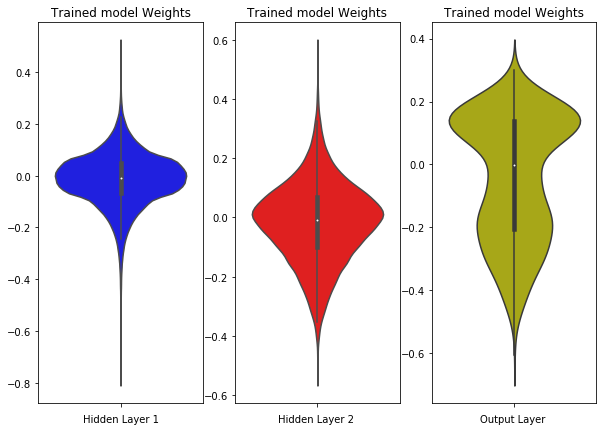

In [0]:
w_after = model1.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure(figsize=(10,7))
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

**1.4 RELU ACTIVATION WITH BATCH NORM**

In [0]:
from keras.layers.normalization import BatchNormalization
model1 = Sequential()
model1.add(Dense(256, input_dim=input_dim, activation='relu'))
model1.add(BatchNormalization())
model1.add(Dense(128, input_dim=input_dim, activation='relu'))
model1.add(BatchNormalization())
model1.add(Dense(10, input_dim=input_dim, activation='softmax'))

In [0]:
model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model1.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 5s 90us/step - loss: 0.2043 - acc: 0.9397 - val_loss: 0.1063 - val_acc: 0.9658
Epoch 2/20
60000/60000 [==============================] - 5s 78us/step - loss: 0.0804 - acc: 0.9761 - val_loss: 0.0876 - val_acc: 0.9730
Epoch 3/20
60000/60000 [==============================] - 5s 79us/step - loss: 0.0528 - acc: 0.9832 - val_loss: 0.0848 - val_acc: 0.9734
Epoch 4/20
60000/60000 [==============================] - 5s 80us/step - loss: 0.0382 - acc: 0.9881 - val_loss: 0.0808 - val_acc: 0.9757
Epoch 5/20
60000/60000 [==============================] - 5s 81us/step - loss: 0.0290 - acc: 0.9905 - val_loss: 0.0792 - val_acc: 0.9766
Epoch 6/20
60000/60000 [==============================] - 5s 77us/step - loss: 0.0252 - acc: 0.9919 - val_loss: 0.0919 - val_acc: 0.9735
Epoch 7/20
60000/60000 [==============================] - 5s 79us/step - loss: 0.0204 - acc: 0.9932 - val_loss: 0.0706 - val_acc

In [0]:
model1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 256)               200960    
_________________________________________________________________
batch_normalization_1 (Batch (None, 256)               1024      
_________________________________________________________________
dense_12 (Dense)             (None, 128)               32896     
_________________________________________________________________
batch_normalization_2 (Batch (None, 128)               512       
_________________________________________________________________
dense_13 (Dense)             (None, 10)                1290      
Total params: 236,682
Trainable params: 235,914
Non-trainable params: 768
_________________________________________________________________


Test score: 0.08686929494800279
Test accuracy: 0.9791


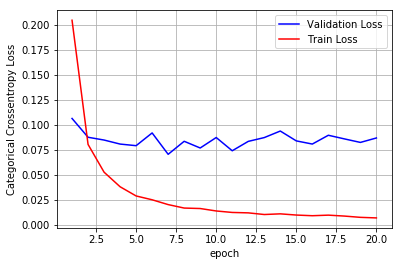

In [0]:
score = model1.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

This model was well trained but failed in validation test due to overfitting.

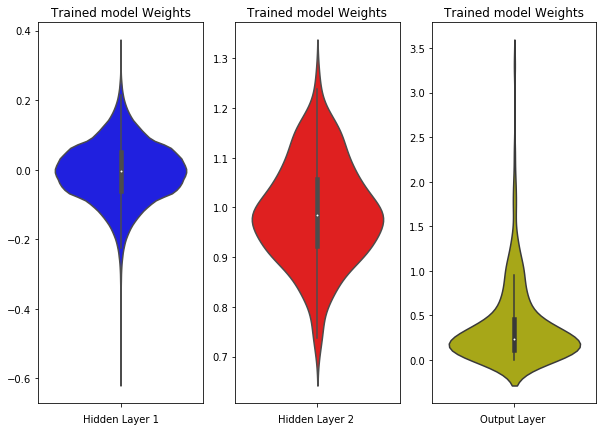

In [0]:
w_after = model1.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure(figsize=(10,7))
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

**1.5 RELU ACTIVATION WITH BATCH NORM AND DROPOUT (0.5)**

In [0]:
from keras.layers.normalization import BatchNormalization
model1 = Sequential()

model1.add(Dense(256, input_dim=input_dim, activation='relu'))
model1.add(BatchNormalization())
model1.add(Dropout(0.5))

model1.add(Dense(128, input_dim=input_dim, activation='relu'))
model1.add(BatchNormalization())
model1.add(Dropout(0.5))

model1.add(Dense(10, input_dim=input_dim, activation='softmax'))

In [0]:
model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model1.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 6s 97us/step - loss: 0.4898 - acc: 0.8517 - val_loss: 0.1640 - val_acc: 0.9482
Epoch 2/20
60000/60000 [==============================] - 5s 81us/step - loss: 0.2463 - acc: 0.9267 - val_loss: 0.1271 - val_acc: 0.9610
Epoch 3/20
60000/60000 [==============================] - 5s 81us/step - loss: 0.1993 - acc: 0.9407 - val_loss: 0.1082 - val_acc: 0.9670
Epoch 4/20
60000/60000 [==============================] - 5s 82us/step - loss: 0.1682 - acc: 0.9491 - val_loss: 0.0979 - val_acc: 0.9697
Epoch 5/20
60000/60000 [==============================] - 5s 82us/step - loss: 0.1533 - acc: 0.9545 - val_loss: 0.0899 - val_acc: 0.9727
Epoch 6/20
60000/60000 [==============================] - 5s 79us/step - loss: 0.1376 - acc: 0.9582 - val_loss: 0.0816 - val_acc: 0.9744
Epoch 7/20
60000/60000 [==============================] - 5s 80us/step - loss: 0.1288 - acc: 0.9610 - val_loss: 0.0803 - val_acc

In [0]:
model1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 256)               200960    
_________________________________________________________________
batch_normalization_4 (Batch (None, 256)               1024      
_________________________________________________________________
dropout_3 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_16 (Dense)             (None, 128)               32896     
_________________________________________________________________
batch_normalization_5 (Batch (None, 128)               512       
_________________________________________________________________
dropout_4 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_17 (Dense)             (None, 10)                1290      
Total para

Test score: 0.06043866992703406
Test accuracy: 0.9821


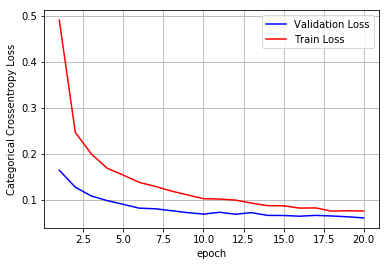

In [0]:
score = model1.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

Model is better than others but not upto the model with dropout.

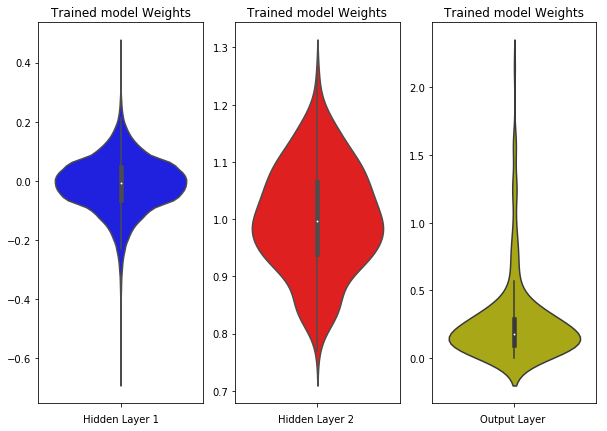

In [0]:
w_after = model1.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure(figsize=(10,7))
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

# MODEL 2 - 3 HIDDEN LAYERS

**2.1 MODEL WITH 2 POWERS AS NUMBER OF HIDDEN LAYERS (RELU ACTIVATION)**

In [0]:
model2 = Sequential()
model2.add(Dense(512, input_dim=input_dim, activation='relu'))
model2.add(Dense(256, input_dim=input_dim, activation='relu'))
model2.add(Dense(128, input_dim=input_dim, activation='relu'))
model2.add(Dense(10, input_dim=input_dim, activation='softmax'))

In [0]:
model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model2.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 4s 70us/step - loss: 0.2289 - acc: 0.9326 - val_loss: 0.1105 - val_acc: 0.9641
Epoch 2/20
60000/60000 [==============================] - 3s 56us/step - loss: 0.0846 - acc: 0.9738 - val_loss: 0.0812 - val_acc: 0.9746
Epoch 3/20
60000/60000 [==============================] - 3s 58us/step - loss: 0.0536 - acc: 0.9833 - val_loss: 0.0849 - val_acc: 0.9735
Epoch 4/20
60000/60000 [==============================] - 3s 56us/step - loss: 0.0396 - acc: 0.9866 - val_loss: 0.0728 - val_acc: 0.9790
Epoch 5/20
60000/60000 [==============================] - 3s 57us/step - loss: 0.0300 - acc: 0.9900 - val_loss: 0.0752 - val_acc: 0.9786
Epoch 6/20
60000/60000 [==============================] - 3s 58us/step - loss: 0.0241 - acc: 0.9921 - val_loss: 0.0730 - val_acc: 0.9802
Epoch 7/20
60000/60000 [==============================] - 3s 56us/step - loss: 0.0227 - acc: 0.9927 - val_loss: 0.0901 - val_acc

In [0]:
model2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_22 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_23 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_24 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_25 (Dense)             (None, 10)                1290      
Total params: 567,434
Trainable params: 567,434
Non-trainable params: 0
_________________________________________________________________


Test score: 0.10877159107371262
Test accuracy: 0.9788


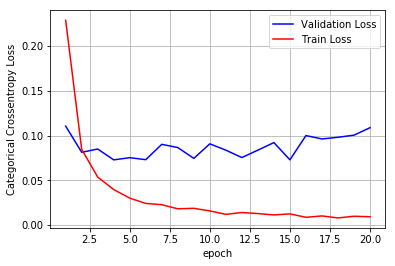

In [0]:
score = model2.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

The model has overfit.

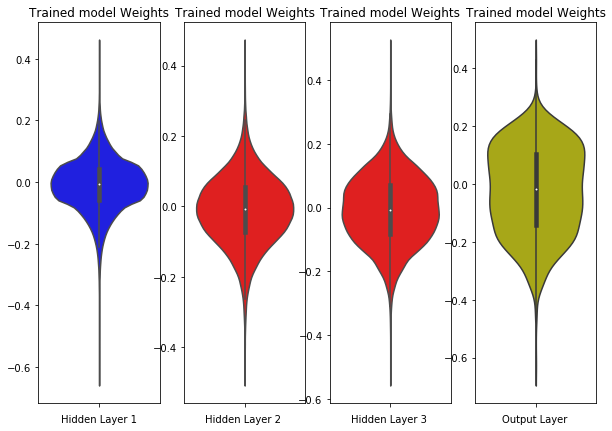

In [0]:
w_after = model2.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
h3_w = w_after[4].flatten().reshape(-1,1)
out_w = w_after[6].flatten().reshape(-1,1)


fig = plt.figure(figsize=(10,7))
plt.title("Weight matrices after model trained")
plt.subplot(1, 4, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 4, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 4, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h3_w, color='r')
plt.xlabel('Hidden Layer 3 ')

plt.subplot(1, 4, 4)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

**2.2 RELU ACTIVATION WITH DROPOUT VALUE 0.5**

In [0]:
from keras.layers import Dropout
model2 = Sequential()
model2.add(Dense(512, input_dim=input_dim, activation='relu'))
model2.add(Dropout(0.5))
model2.add(Dense(256, input_dim=input_dim, activation='relu'))
model2.add(Dropout(0.5))
model2.add(Dense(128, input_dim=input_dim, activation='relu'))
model2.add(Dropout(0.5))
model2.add(Dense(10, input_dim=input_dim, activation='softmax'))

In [0]:
model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model2.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 4s 74us/step - loss: 0.5487 - acc: 0.8282 - val_loss: 0.1492 - val_acc: 0.9546
Epoch 2/20
60000/60000 [==============================] - 4s 61us/step - loss: 0.2275 - acc: 0.9369 - val_loss: 0.1108 - val_acc: 0.9671
Epoch 3/20
60000/60000 [==============================] - 4s 60us/step - loss: 0.1762 - acc: 0.9501 - val_loss: 0.0952 - val_acc: 0.9717
Epoch 4/20
60000/60000 [==============================] - 4s 61us/step - loss: 0.1512 - acc: 0.9580 - val_loss: 0.0834 - val_acc: 0.9756
Epoch 5/20
60000/60000 [==============================] - 4s 59us/step - loss: 0.1337 - acc: 0.9623 - val_loss: 0.0789 - val_acc: 0.9776
Epoch 6/20
60000/60000 [==============================] - 4s 59us/step - loss: 0.1204 - acc: 0.9666 - val_loss: 0.0791 - val_acc: 0.9762
Epoch 7/20
60000/60000 [==============================] - 4s 59us/step - loss: 0.1140 - acc: 0.9673 - val_loss: 0.0703 - val_acc

In [0]:
model2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_26 (Dense)             (None, 512)               401920    
_________________________________________________________________
dropout_5 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_27 (Dense)             (None, 256)               131328    
_________________________________________________________________
dropout_6 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_28 (Dense)             (None, 128)               32896     
_________________________________________________________________
dropout_7 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_29 (Dense)             (None, 10)                1290      
Total para

Test score: 0.06652374192810584
Test accuracy: 0.9828


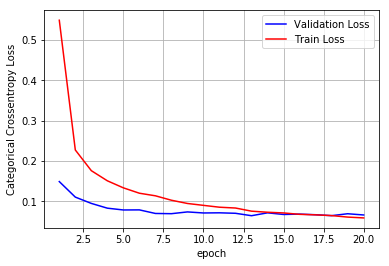

In [0]:
score = model2.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

A little overfitting is seen at the final few epochs

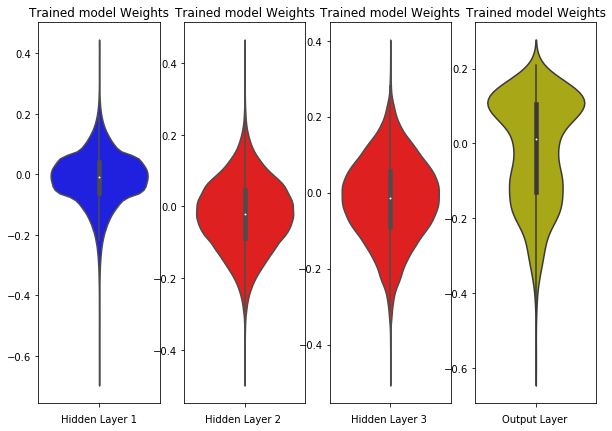

In [0]:
w_after = model2.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
h3_w = w_after[4].flatten().reshape(-1,1)
out_w = w_after[6].flatten().reshape(-1,1)


fig = plt.figure(figsize=(10,7))
plt.title("Weight matrices after model trained")
plt.subplot(1, 4, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 4, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 4, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h3_w, color='r')
plt.xlabel('Hidden Layer 3 ')

plt.subplot(1, 4, 4)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

**2.3 RELU ACTIVATION WITH BATCH NORM**

In [0]:
from keras.layers.normalization import BatchNormalization
model2 = Sequential()
model2.add(Dense(512, input_dim=input_dim, activation='relu'))
model2.add(BatchNormalization())
model2.add(Dense(256, input_dim=input_dim, activation='relu'))
model2.add(BatchNormalization())
model2.add(Dense(128, input_dim=input_dim, activation='relu'))
model2.add(BatchNormalization())
model2.add(Dense(10, input_dim=input_dim, activation='softmax'))

In [0]:
model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model2.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 8s 129us/step - loss: 0.1770 - acc: 0.9460 - val_loss: 0.1025 - val_acc: 0.9682
Epoch 2/20
60000/60000 [==============================] - 6s 103us/step - loss: 0.0715 - acc: 0.9773 - val_loss: 0.0848 - val_acc: 0.9748
Epoch 3/20
60000/60000 [==============================] - 6s 105us/step - loss: 0.0497 - acc: 0.9844 - val_loss: 0.0970 - val_acc: 0.9728
Epoch 4/20
60000/60000 [==============================] - 6s 104us/step - loss: 0.0378 - acc: 0.9877 - val_loss: 0.0878 - val_acc: 0.9721
Epoch 5/20
60000/60000 [==============================] - 6s 105us/step - loss: 0.0333 - acc: 0.9890 - val_loss: 0.0793 - val_acc: 0.9770
Epoch 6/20
60000/60000 [==============================] - 6s 107us/step - loss: 0.0262 - acc: 0.9915 - val_loss: 0.0706 - val_acc: 0.9801
Epoch 7/20
60000/60000 [==============================] - 6s 104us/step - loss: 0.0219 - acc: 0.9927 - val_loss: 0.0877 - 

In [0]:
model2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_30 (Dense)             (None, 512)               401920    
_________________________________________________________________
batch_normalization_6 (Batch (None, 512)               2048      
_________________________________________________________________
dense_31 (Dense)             (None, 256)               131328    
_________________________________________________________________
batch_normalization_7 (Batch (None, 256)               1024      
_________________________________________________________________
dense_32 (Dense)             (None, 128)               32896     
_________________________________________________________________
batch_normalization_8 (Batch (None, 128)               512       
_________________________________________________________________
dense_33 (Dense)             (None, 10)                1290      
Total para

Test score: 0.07200342553501614
Test accuracy: 0.9837


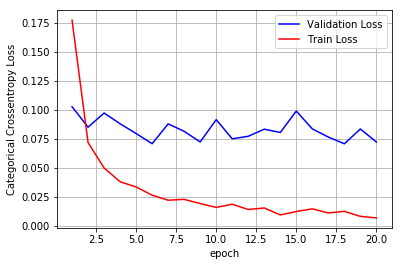

In [0]:
score = model2.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

Again overfitting has occured

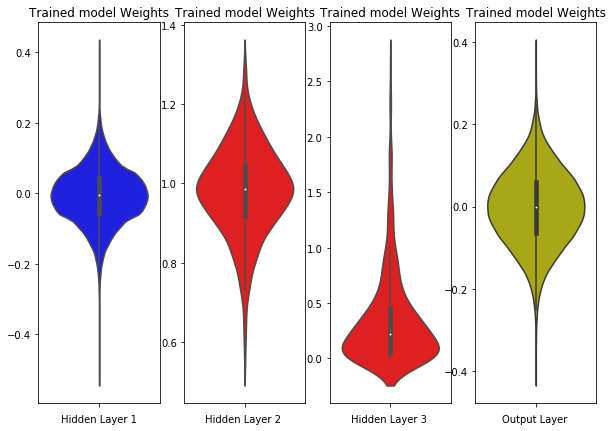

In [0]:
w_after = model2.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
h3_w = w_after[4].flatten().reshape(-1,1)
out_w = w_after[6].flatten().reshape(-1,1)


fig = plt.figure(figsize=(10,7))
plt.title("Weight matrices after model trained")
plt.subplot(1, 4, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 4, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 4, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h3_w, color='r')
plt.xlabel('Hidden Layer 3 ')

plt.subplot(1, 4, 4)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

**2.4 RELU ACTIVATION WITH BATCH NORM AND DROPOUT (0.5)**

In [0]:
from keras.layers.normalization import BatchNormalization
model2 = Sequential()

model2.add(Dense(512, input_dim=input_dim, activation='relu'))
model2.add(BatchNormalization())
model2.add(Dropout(0.5))

model2.add(Dense(256, input_dim=input_dim, activation='relu'))
model2.add(BatchNormalization())
model2.add(Dropout(0.5))

model2.add(Dense(128, input_dim=input_dim, activation='relu'))
model2.add(BatchNormalization())
model2.add(Dropout(0.5))

model2.add(Dense(10, input_dim=input_dim, activation='softmax'))

In [0]:
model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model2.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 8s 139us/step - loss: 0.5245 - acc: 0.8400 - val_loss: 0.1583 - val_acc: 0.9524
Epoch 2/20
60000/60000 [==============================] - 7s 110us/step - loss: 0.2361 - acc: 0.9308 - val_loss: 0.1084 - val_acc: 0.9665
Epoch 3/20
60000/60000 [==============================] - 6s 107us/step - loss: 0.1844 - acc: 0.9447 - val_loss: 0.0976 - val_acc: 0.9702
Epoch 4/20
60000/60000 [==============================] - 6s 108us/step - loss: 0.1586 - acc: 0.9538 - val_loss: 0.0869 - val_acc: 0.9738
Epoch 5/20
60000/60000 [==============================] - 7s 109us/step - loss: 0.1410 - acc: 0.9583 - val_loss: 0.0880 - val_acc: 0.9741
Epoch 6/20
60000/60000 [==============================] - 7s 109us/step - loss: 0.1284 - acc: 0.9615 - val_loss: 0.0775 - val_acc: 0.9756
Epoch 7/20
60000/60000 [==============================] - 6s 107us/step - loss: 0.1172 - acc: 0.9647 - val_loss: 0.0731 - 

In [0]:
model2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_38 (Dense)             (None, 512)               401920    
_________________________________________________________________
batch_normalization_12 (Batc (None, 512)               2048      
_________________________________________________________________
dropout_11 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_39 (Dense)             (None, 256)               131328    
_________________________________________________________________
batch_normalization_13 (Batc (None, 256)               1024      
_________________________________________________________________
dropout_12 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_40 (Dense)             (None, 128)               32896     
__________

Test score: 0.057054539459303485
Test accuracy: 0.9844


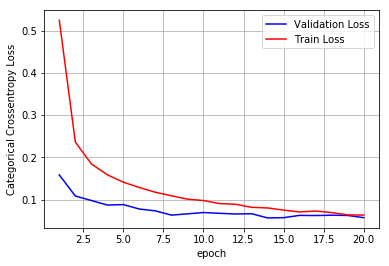

In [0]:
score = model2.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

The best model in 3 hidden layer models.

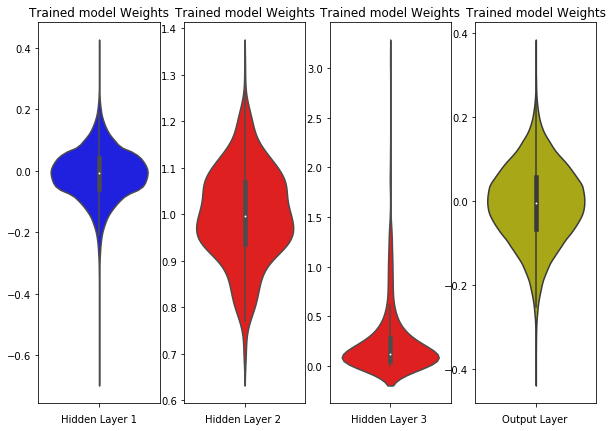

In [0]:
w_after = model2.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
h3_w = w_after[4].flatten().reshape(-1,1)
out_w = w_after[6].flatten().reshape(-1,1)


fig = plt.figure(figsize=(10,7))
plt.title("Weight matrices after model trained")
plt.subplot(1, 4, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 4, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 4, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h3_w, color='r')
plt.xlabel('Hidden Layer 3 ')

plt.subplot(1, 4, 4)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

# MODEL 3 - 5 HIDDEN LAYERS

**3.1 MODEL WITH 2 POWERS AS NUMBER OF HIDDEN LAYERS (RELU ACTIVATION)**

In [0]:
model3 = Sequential()
model3.add(Dense(512, input_dim=input_dim, activation='relu'))
model3.add(Dense(256, input_dim=input_dim, activation='relu'))
model3.add(Dense(128, input_dim=input_dim, activation='relu'))
model3.add(Dense(64, input_dim=input_dim, activation='relu'))
model3.add(Dense(10, input_dim=input_dim, activation='softmax'))

In [0]:
model3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model3.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 5s 85us/step - loss: 0.2399 - acc: 0.9279 - val_loss: 0.1218 - val_acc: 0.9621
Epoch 2/20
60000/60000 [==============================] - 4s 63us/step - loss: 0.0875 - acc: 0.9728 - val_loss: 0.0844 - val_acc: 0.9743
Epoch 3/20
60000/60000 [==============================] - 4s 62us/step - loss: 0.0589 - acc: 0.9813 - val_loss: 0.0850 - val_acc: 0.9735
Epoch 4/20
60000/60000 [==============================] - 4s 63us/step - loss: 0.0432 - acc: 0.9866 - val_loss: 0.0687 - val_acc: 0.9798
Epoch 5/20
60000/60000 [==============================] - 4s 62us/step - loss: 0.0329 - acc: 0.9889 - val_loss: 0.0798 - val_acc: 0.9769
Epoch 6/20
60000/60000 [==============================] - 4s 61us/step - loss: 0.0307 - acc: 0.9899 - val_loss: 0.0676 - val_acc: 0.9804
Epoch 7/20
60000/60000 [==============================] - 4s 61us/step - loss: 0.0249 - acc: 0.9920 - val_loss: 0.0768 - val_acc

In [0]:
model3.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_42 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_43 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_44 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_45 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_46 (Dense)             (None, 10)                650       
Total params: 575,050
Trainable params: 575,050
Non-trainable params: 0
_________________________________________________________________


Test score: 0.08486868686463067
Test accuracy: 0.9813


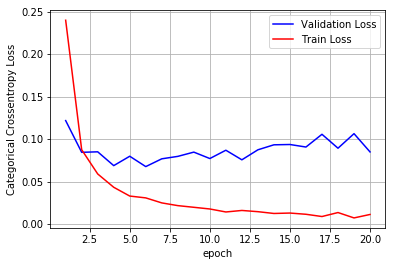

In [0]:
score = model3.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

Overfitting is observed.

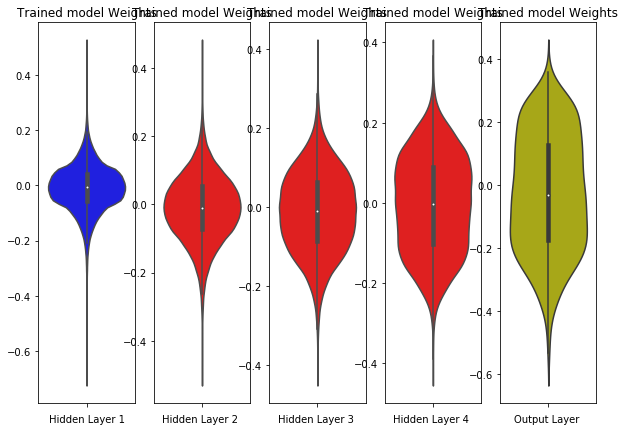

In [0]:
w_after = model3.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
h3_w = w_after[4].flatten().reshape(-1,1)
h4_w = w_after[6].flatten().reshape(-1,1)
out_w = w_after[8].flatten().reshape(-1,1)


fig = plt.figure(figsize=(10,7))
plt.title("Weight matrices after model trained")
plt.subplot(1, 5, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 5, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 5, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h3_w, color='r')
plt.xlabel('Hidden Layer 3 ')

plt.subplot(1, 5, 4)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h4_w, color='r')
plt.xlabel('Hidden Layer 4 ')

plt.subplot(1, 5, 5)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

**3.2 RELU ACTIVATION WITH DROPOUT VALUE 0.5**

In [0]:
from keras.layers import Dropout
model3 = Sequential()
model3.add(Dense(512, input_dim=input_dim, activation='relu'))
model3.add(Dropout(0.5))
model3.add(Dense(256, input_dim=input_dim, activation='relu'))
model3.add(Dropout(0.5))
model3.add(Dense(128, input_dim=input_dim, activation='relu'))
model3.add(Dropout(0.5))
model3.add(Dense(64, input_dim=input_dim, activation='relu'))
model3.add(Dropout(0.5))
model3.add(Dense(10, input_dim=input_dim, activation='softmax'))

In [0]:
model3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model3.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 6s 95us/step - loss: 0.8366 - acc: 0.7285 - val_loss: 0.2140 - val_acc: 0.9408
Epoch 2/20
60000/60000 [==============================] - 4s 65us/step - loss: 0.3213 - acc: 0.9203 - val_loss: 0.1466 - val_acc: 0.9608
Epoch 3/20
60000/60000 [==============================] - 4s 66us/step - loss: 0.2444 - acc: 0.9390 - val_loss: 0.1272 - val_acc: 0.9682
Epoch 4/20
60000/60000 [==============================] - 4s 65us/step - loss: 0.2060 - acc: 0.9502 - val_loss: 0.1079 - val_acc: 0.9716
Epoch 5/20
60000/60000 [==============================] - 4s 66us/step - loss: 0.1863 - acc: 0.9544 - val_loss: 0.1049 - val_acc: 0.9723
Epoch 6/20
60000/60000 [==============================] - 4s 67us/step - loss: 0.1709 - acc: 0.9578 - val_loss: 0.1066 - val_acc: 0.9739
Epoch 7/20
60000/60000 [==============================] - 4s 66us/step - loss: 0.1585 - acc: 0.9613 - val_loss: 0.1017 - val_acc

In [0]:
model3.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_47 (Dense)             (None, 512)               401920    
_________________________________________________________________
dropout_14 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_48 (Dense)             (None, 256)               131328    
_________________________________________________________________
dropout_15 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_49 (Dense)             (None, 128)               32896     
_________________________________________________________________
dropout_16 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_50 (Dense)             (None, 64)                8256      
__________

Test score: 0.07358933680157234
Test accuracy: 0.982


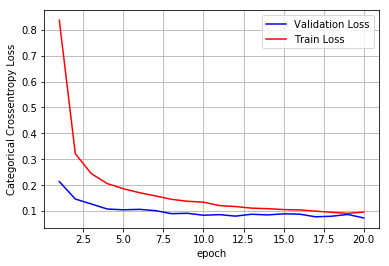

In [0]:
score = model3.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

The best model in 5 hidden layer models.

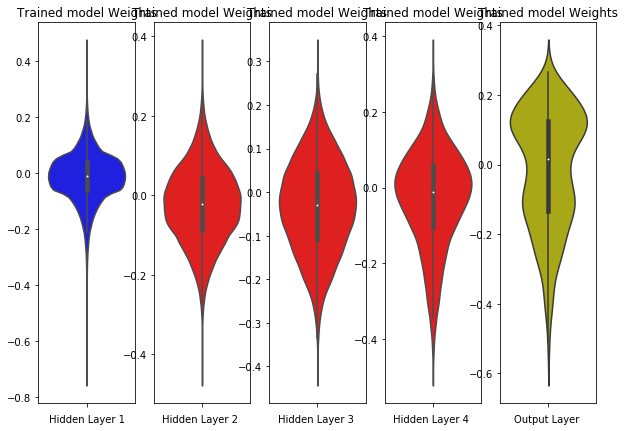

In [0]:
w_after = model3.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
h3_w = w_after[4].flatten().reshape(-1,1)
h4_w = w_after[6].flatten().reshape(-1,1)
out_w = w_after[8].flatten().reshape(-1,1)


fig = plt.figure(figsize=(10,7))
plt.title("Weight matrices after model trained")
plt.subplot(1, 5, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 5, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 5, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h3_w, color='r')
plt.xlabel('Hidden Layer 3 ')

plt.subplot(1, 5, 4)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h4_w, color='r')
plt.xlabel('Hidden Layer 4 ')

plt.subplot(1, 5, 5)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

**3.3 RELU ACTIVATION WITH BATCH NORM**

In [0]:
from keras.layers.normalization import BatchNormalization
model3 = Sequential()
model3.add(Dense(512, input_dim=input_dim, activation='relu'))
model3.add(BatchNormalization())
model3.add(Dense(256, input_dim=input_dim, activation='relu'))
model3.add(BatchNormalization())
model3.add(Dense(128, input_dim=input_dim, activation='relu'))
model3.add(BatchNormalization())
model3.add(Dense(64, input_dim=input_dim, activation='relu'))
model3.add(BatchNormalization())
model3.add(Dense(10, input_dim=input_dim, activation='softmax'))

In [0]:
model3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model3.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 10s 162us/step - loss: 0.2005 - acc: 0.9407 - val_loss: 0.0970 - val_acc: 0.9689
Epoch 2/20
60000/60000 [==============================] - 7s 124us/step - loss: 0.0809 - acc: 0.9753 - val_loss: 0.1065 - val_acc: 0.9652
Epoch 3/20
60000/60000 [==============================] - 8s 126us/step - loss: 0.0576 - acc: 0.9820 - val_loss: 0.1053 - val_acc: 0.9676
Epoch 4/20
60000/60000 [==============================] - 8s 127us/step - loss: 0.0441 - acc: 0.9858 - val_loss: 0.0779 - val_acc: 0.9763
Epoch 5/20
60000/60000 [==============================] - 7s 122us/step - loss: 0.0354 - acc: 0.9886 - val_loss: 0.0798 - val_acc: 0.9771
Epoch 6/20
60000/60000 [==============================] - 8s 126us/step - loss: 0.0313 - acc: 0.9899 - val_loss: 0.0671 - val_acc: 0.9819
Epoch 7/20
60000/60000 [==============================] - 7s 122us/step - loss: 0.0272 - acc: 0.9911 - val_loss: 0.0701 -

In [0]:
model3.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_52 (Dense)             (None, 512)               401920    
_________________________________________________________________
batch_normalization_15 (Batc (None, 512)               2048      
_________________________________________________________________
dense_53 (Dense)             (None, 256)               131328    
_________________________________________________________________
batch_normalization_16 (Batc (None, 256)               1024      
_________________________________________________________________
dense_54 (Dense)             (None, 128)               32896     
_________________________________________________________________
batch_normalization_17 (Batc (None, 128)               512       
_________________________________________________________________
dense_55 (Dense)             (None, 64)                8256      
__________

Test score: 0.1004731001386419
Test accuracy: 0.9774


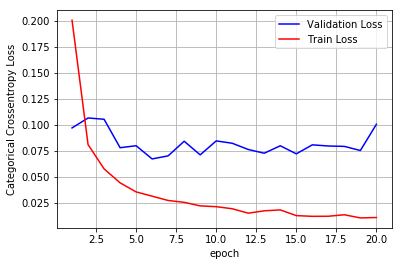

In [0]:
score = model3.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

Overfitting at the very early epochs.

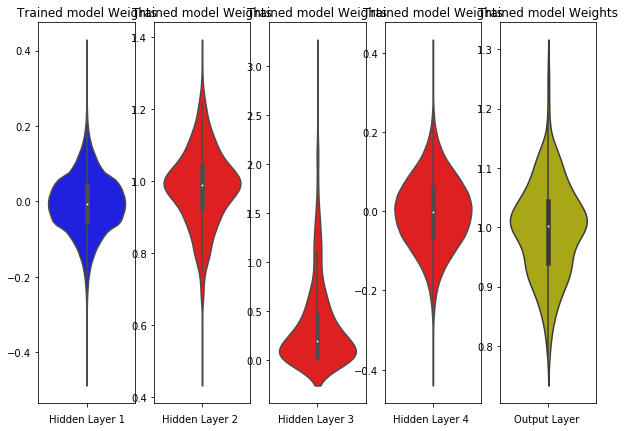

In [0]:
w_after = model3.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
h3_w = w_after[4].flatten().reshape(-1,1)
h4_w = w_after[6].flatten().reshape(-1,1)
out_w = w_after[8].flatten().reshape(-1,1)


fig = plt.figure(figsize=(10,7))
plt.title("Weight matrices after model trained")
plt.subplot(1, 5, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 5, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 5, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h3_w, color='r')
plt.xlabel('Hidden Layer 3 ')

plt.subplot(1, 5, 4)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h4_w, color='r')
plt.xlabel('Hidden Layer 4 ')

plt.subplot(1, 5, 5)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

**3.4 RELU ACTIVATION WITH BATCH NORM AND DROPOUT (0.5)**

In [0]:
from keras.layers.normalization import BatchNormalization
model3 = Sequential()

model3.add(Dense(512, input_dim=input_dim, activation='relu'))
model3.add(BatchNormalization())
model3.add(Dropout(0.5))

model3.add(Dense(256, input_dim=input_dim, activation='relu'))
model3.add(BatchNormalization())
model3.add(Dropout(0.5))

model3.add(Dense(128, input_dim=input_dim, activation='relu'))
model3.add(BatchNormalization())
model3.add(Dropout(0.5))

model3.add(Dense(64, input_dim=input_dim, activation='relu'))
model3.add(BatchNormalization())
model3.add(Dropout(0.5))

model3.add(Dense(10, input_dim=input_dim, activation='softmax'))

In [0]:
model3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model3.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 11s 180us/step - loss: 0.8112 - acc: 0.7534 - val_loss: 0.2031 - val_acc: 0.9414
Epoch 2/20
60000/60000 [==============================] - 8s 131us/step - loss: 0.3121 - acc: 0.9153 - val_loss: 0.1321 - val_acc: 0.9625
Epoch 3/20
60000/60000 [==============================] - 8s 129us/step - loss: 0.2375 - acc: 0.9369 - val_loss: 0.1194 - val_acc: 0.9650
Epoch 4/20
60000/60000 [==============================] - 8s 129us/step - loss: 0.2027 - acc: 0.9460 - val_loss: 0.1066 - val_acc: 0.9689
Epoch 5/20
60000/60000 [==============================] - 8s 130us/step - loss: 0.1734 - acc: 0.9541 - val_loss: 0.0918 - val_acc: 0.9746
Epoch 6/20
60000/60000 [==============================] - 8s 131us/step - loss: 0.1629 - acc: 0.9556 - val_loss: 0.0926 - val_acc: 0.9748
Epoch 7/20
60000/60000 [==============================] - 8s 128us/step - loss: 0.1523 - acc: 0.9597 - val_loss: 0.0850 -

In [0]:
model3.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_57 (Dense)             (None, 512)               401920    
_________________________________________________________________
batch_normalization_19 (Batc (None, 512)               2048      
_________________________________________________________________
dropout_18 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_58 (Dense)             (None, 256)               131328    
_________________________________________________________________
batch_normalization_20 (Batc (None, 256)               1024      
_________________________________________________________________
dropout_19 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_59 (Dense)             (None, 128)               32896     
__________

Test score: 0.06762448588523548
Test accuracy: 0.9821


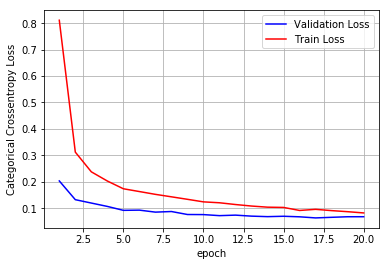

In [0]:
score = model3.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

Better than many models.

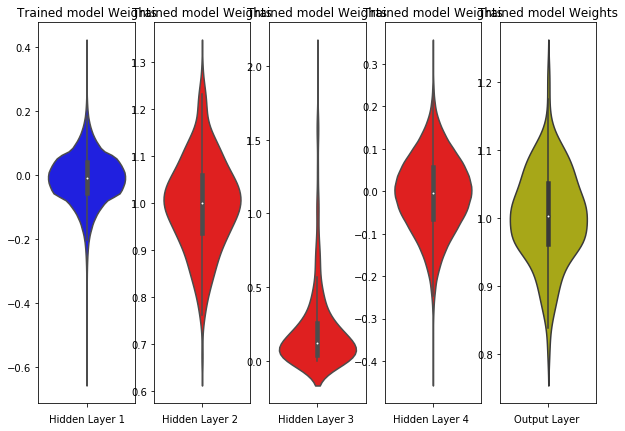

In [0]:
w_after = model3.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
h3_w = w_after[4].flatten().reshape(-1,1)
h4_w = w_after[6].flatten().reshape(-1,1)
out_w = w_after[8].flatten().reshape(-1,1)


fig = plt.figure(figsize=(10,7))
plt.title("Weight matrices after model trained")
plt.subplot(1, 5, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 5, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 5, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h3_w, color='r')
plt.xlabel('Hidden Layer 3 ')

plt.subplot(1, 5, 4)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h4_w, color='r')
plt.xlabel('Hidden Layer 4 ')

plt.subplot(1, 5, 5)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

**4.1 RELU ACTIVATION WITH DROPOUT VALUE 0.5 (Optimiser - RMSPROP)**

In [0]:
from keras.layers import Dropout
model4 = Sequential()
model4.add(Dense(512, input_dim=input_dim, activation='relu'))
model4.add(Dropout(0.5))
model4.add(Dense(256, input_dim=input_dim, activation='relu'))
model4.add(Dropout(0.5))
model4.add(Dense(128, input_dim=input_dim, activation='relu'))
model4.add(Dropout(0.5))
model4.add(Dense(10, input_dim=input_dim, activation='softmax'))

In [15]:
model4.compile(optimizer='RMSprop', loss='categorical_crossentropy', metrics=['accuracy'])

history = model4.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 8s 134us/step - loss: 0.5014 - acc: 0.8458 - val_loss: 0.1567 - val_acc: 0.9526
Epoch 2/20
60000/60000 [==============================] - 3s 54us/step - loss: 0.2250 - acc: 0.9398 - val_loss: 0.1244 - val_acc: 0.9663
Epoch 3/20
60000/60000 [==============================] - 3s 53us/step - loss: 0.1815 - acc: 0.9515 - val_loss: 0.1005 - val_acc: 0.9705
Epoch 4/20
60000/60000 [==============================] - 3s 54us/step - loss: 0.1602 - acc: 0.9590 - val_loss: 0.1014 - val_acc: 0.9744
Epoch 5/20
60000/60000 [==============================] - 3s 53us/step - loss: 0.1499 - acc: 0.9622 - val_loss: 0.0998 - val_acc: 0.9756
Epoch 6/20
60000/60000 [==============================] - 3s 53us/step - loss: 0.1418 - acc: 0.9658 - val_loss: 0.1051 - val_acc: 0.9761
Epoch 7/20
60000/60000 [=========

In [16]:
model4.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 512)               401920    
_________________________________________________________________
dropout_4 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 256)               131328    
_________________________________________________________________
dropout_5 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 128)               32896     
_________________________________________________________________
dropout_6 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 10)               

Test score: 0.11451425200372187
Test accuracy: 0.9794


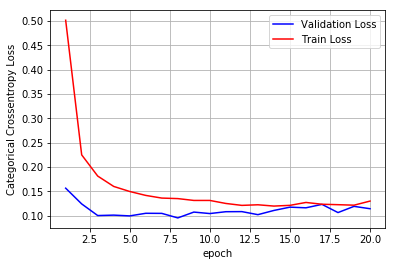

In [17]:
score = model4.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

Good stats seen all along the epochs.

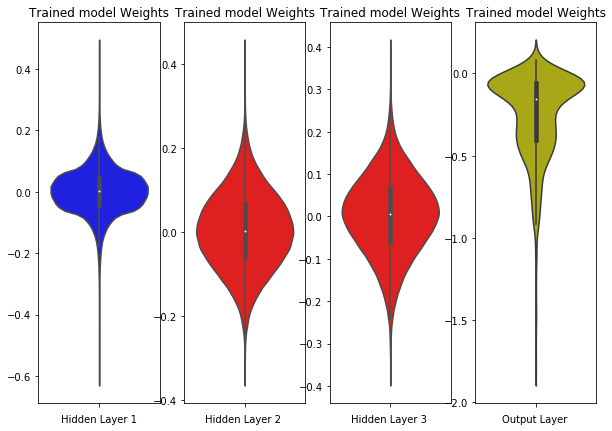

In [18]:
w_after = model4.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
h3_w = w_after[4].flatten().reshape(-1,1)
out_w = w_after[6].flatten().reshape(-1,1)


fig = plt.figure(figsize=(10,7))
plt.title("Weight matrices after model trained")
plt.subplot(1, 4, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 4, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 4, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h3_w, color='r')
plt.xlabel('Hidden Layer 3 ')

plt.subplot(1, 4, 4)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

**4.2 RELU ACTIVATION WITH BATCH NORM AND DROPOUT(0.3) Optimiser-(RMSprop)**

In [0]:
from keras.layers.normalization import BatchNormalization
model4 = Sequential()

model4.add(Dense(512, input_dim=input_dim, activation='relu'))
model4.add(BatchNormalization())
model4.add(Dropout(0.3))

model4.add(Dense(256, input_dim=input_dim, activation='relu'))
model4.add(BatchNormalization())
model4.add(Dropout(0.3))

model4.add(Dense(128, input_dim=input_dim, activation='relu'))
model4.add(BatchNormalization())
model4.add(Dropout(0.3))

model4.add(Dense(10, input_dim=input_dim, activation='softmax'))

In [20]:
model4.compile(optimizer='RMSprop', loss='categorical_crossentropy', metrics=['accuracy'])

history = model4.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 7s 116us/step - loss: 0.2904 - acc: 0.9130 - val_loss: 0.1020 - val_acc: 0.9680
Epoch 2/20
60000/60000 [==============================] - 6s 103us/step - loss: 0.1353 - acc: 0.9599 - val_loss: 0.0881 - val_acc: 0.9724
Epoch 3/20
60000/60000 [==============================] - 6s 103us/step - loss: 0.1040 - acc: 0.9687 - val_loss: 0.0740 - val_acc: 0.9779
Epoch 4/20
60000/60000 [==============================] - 6s 102us/step - loss: 0.0854 - acc: 0.9735 - val_loss: 0.0634 - val_acc: 0.9809
Epoch 5/20
60000/60000 [==============================] - 6s 102us/step - loss: 0.0745 - acc: 0.9778 - val_loss: 0.0631 - val_acc: 0.9819
Epoch 6/20
60000/60000 [==============================] - 6s 101us/step - loss: 0.0641 - acc: 0.9803 - val_loss: 0.0611 - val_acc: 0.9814
Epoch 7/20
60000/60000 [==============================] - 6s 102us/step - loss: 0.0560 - acc: 0.9827 - val_loss: 0.0607 - 

In [21]:
model4.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 512)               401920    
_________________________________________________________________
batch_normalization_1 (Batch (None, 512)               2048      
_________________________________________________________________
dropout_7 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 256)               131328    
_________________________________________________________________
batch_normalization_2 (Batch (None, 256)               1024      
_________________________________________________________________
dropout_8 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 128)              

Test score: 0.05845784421725511
Test accuracy: 0.9854


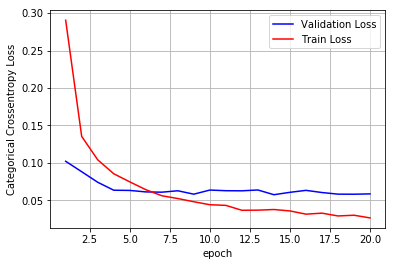

In [22]:
score = model4.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

The little value of dropout made the model to overfit at 6th epoch.But the stats are good till the end.

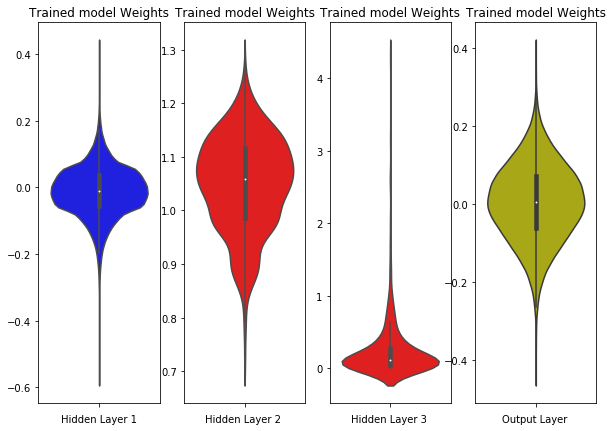

In [23]:
w_after = model4.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
h3_w = w_after[4].flatten().reshape(-1,1)
out_w = w_after[6].flatten().reshape(-1,1)


fig = plt.figure(figsize=(10,7))
plt.title("Weight matrices after model trained")
plt.subplot(1, 4, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 4, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 4, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h3_w, color='r')
plt.xlabel('Hidden Layer 3 ')

plt.subplot(1, 4, 4)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

**4.3 RELU ACTIVATION WITH BATCH NORM (Optimiser-RMSProp)**

In [0]:
from keras.layers.normalization import BatchNormalization
model4 = Sequential()

model4.add(Dense(512, input_dim=input_dim, activation='relu'))
model4.add(BatchNormalization())

model4.add(Dense(256, input_dim=input_dim, activation='relu'))
model4.add(BatchNormalization())

model4.add(Dense(128, input_dim=input_dim, activation='relu'))
model4.add(BatchNormalization())

model4.add(Dense(10, input_dim=input_dim, activation='softmax'))

In [25]:
model4.compile(optimizer='RMSprop', loss='categorical_crossentropy', metrics=['accuracy'])

history = model4.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 7s 111us/step - loss: 0.1710 - acc: 0.9479 - val_loss: 0.0983 - val_acc: 0.9690
Epoch 2/20
60000/60000 [==============================] - 6s 95us/step - loss: 0.0748 - acc: 0.9770 - val_loss: 0.0898 - val_acc: 0.9725
Epoch 3/20
60000/60000 [==============================] - 6s 95us/step - loss: 0.0495 - acc: 0.9848 - val_loss: 0.0716 - val_acc: 0.9778
Epoch 4/20
60000/60000 [==============================] - 6s 95us/step - loss: 0.0369 - acc: 0.9885 - val_loss: 0.0698 - val_acc: 0.9793
Epoch 5/20
60000/60000 [==============================] - 6s 94us/step - loss: 0.0270 - acc: 0.9913 - val_loss: 0.0714 - val_acc: 0.9787
Epoch 6/20
60000/60000 [==============================] - 6s 94us/step - loss: 0.0239 - acc: 0.9924 - val_loss: 0.0660 - val_acc: 0.9816
Epoch 7/20
60000/60000 [==============================] - 6s 96us/step - loss: 0.0178 - acc: 0.9944 - val_loss: 0.0843 - val_ac

In [26]:
model4.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 512)               401920    
_________________________________________________________________
batch_normalization_4 (Batch (None, 512)               2048      
_________________________________________________________________
dense_14 (Dense)             (None, 256)               131328    
_________________________________________________________________
batch_normalization_5 (Batch (None, 256)               1024      
_________________________________________________________________
dense_15 (Dense)             (None, 128)               32896     
_________________________________________________________________
batch_normalization_6 (Batch (None, 128)               512       
_________________________________________________________________
dense_16 (Dense)             (None, 10)               

Test score: 0.10336758222593094
Test accuracy: 0.9799


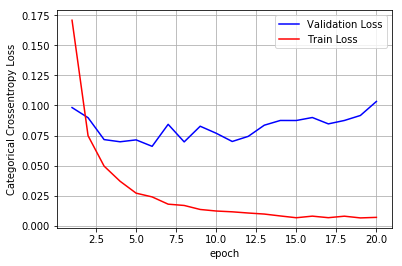

In [27]:
score = model4.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

Best case of overfitting till now.

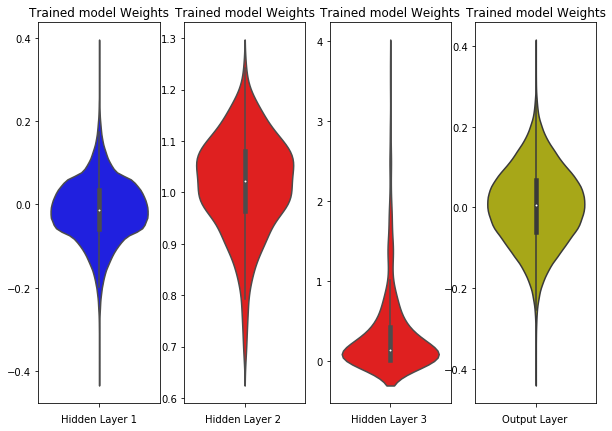

In [28]:
w_after = model4.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
h3_w = w_after[4].flatten().reshape(-1,1)
out_w = w_after[6].flatten().reshape(-1,1)


fig = plt.figure(figsize=(10,7))
plt.title("Weight matrices after model trained")
plt.subplot(1, 4, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 4, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 4, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h3_w, color='r')
plt.xlabel('Hidden Layer 3 ')

plt.subplot(1, 4, 4)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

**5.1 SIGMOID ACTIVATION WITH DROPOUT VALUE 0.4 (Optimiser - SGD)**

In [0]:
from keras.layers import Dropout
model5 = Sequential()
model5.add(Dense(512, input_dim=input_dim, activation='relu'))
model5.add(Dropout(0.4))
model5.add(Dense(256, input_dim=input_dim, activation='relu'))
model5.add(Dropout(0.4))
model5.add(Dense(128, input_dim=input_dim, activation='relu'))
model5.add(Dropout(0.4))
model5.add(Dense(10, input_dim=input_dim, activation='softmax'))

In [32]:
model5.compile(optimizer='SGD', loss='categorical_crossentropy', metrics=['accuracy'])

history = model5.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 4s 60us/step - loss: 1.6945 - acc: 0.4247 - val_loss: 0.7545 - val_acc: 0.8054
Epoch 2/20
60000/60000 [==============================] - 3s 50us/step - loss: 0.8934 - acc: 0.7086 - val_loss: 0.4545 - val_acc: 0.8809
Epoch 3/20
60000/60000 [==============================] - 3s 51us/step - loss: 0.6628 - acc: 0.7939 - val_loss: 0.3635 - val_acc: 0.8979
Epoch 4/20
60000/60000 [==============================] - 3s 50us/step - loss: 0.5537 - acc: 0.8311 - val_loss: 0.3132 - val_acc: 0.9098
Epoch 5/20
60000/60000 [==============================] - 3s 50us/step - loss: 0.4898 - acc: 0.8530 - val_loss: 0.2830 - val_acc: 0.9185
Epoch 6/20
60000/60000 [==============================] - 3s 51us/step - loss: 0.4421 - acc: 0.8677 - val_loss: 0.2596 - val_acc: 0.9258
Epoch 7/20
60000/60000 [==============================] - 3s 50us/step - loss: 0.4044 - acc: 0.8799 - val_loss: 0.2398 - val_acc

In [33]:
model5.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 512)               401920    
_________________________________________________________________
dropout_13 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_22 (Dense)             (None, 256)               131328    
_________________________________________________________________
dropout_14 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_23 (Dense)             (None, 128)               32896     
_________________________________________________________________
dropout_15 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_24 (Dense)             (None, 10)               

Test score: 0.13570419172216205
Test accuracy: 0.959


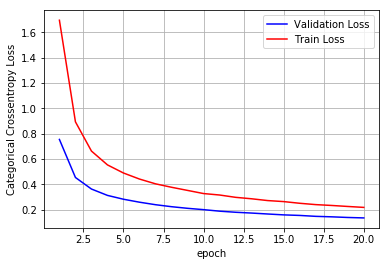

In [34]:
score = model5.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

Although it is a slow learner there is no under fitting nor overfitting.

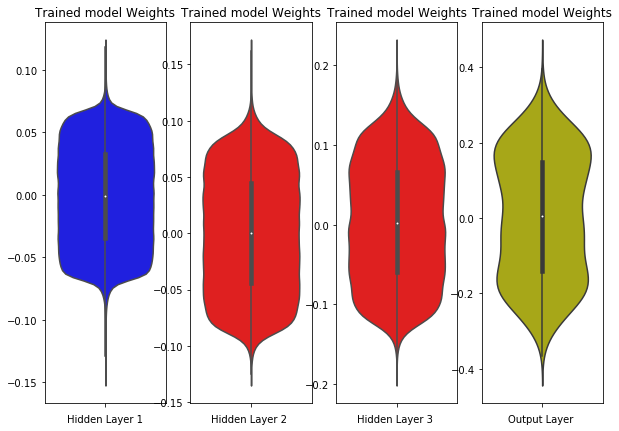

In [35]:
w_after = model5.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
h3_w = w_after[4].flatten().reshape(-1,1)
out_w = w_after[6].flatten().reshape(-1,1)


fig = plt.figure(figsize=(10,7))
plt.title("Weight matrices after model trained")
plt.subplot(1, 4, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 4, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 4, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h3_w, color='r')
plt.xlabel('Hidden Layer 3 ')

plt.subplot(1, 4, 4)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

**5.2 RELU ACTIVATION WITH BATCH NORM AND DROPOUT(0.3) Optimiser-(SGD)**

In [0]:
from keras.layers.normalization import BatchNormalization
model5 = Sequential()

model5.add(Dense(512, input_dim=input_dim, activation='relu'))
model5.add(BatchNormalization())
model5.add(Dropout(0.3))

model5.add(Dense(256, input_dim=input_dim, activation='relu'))
model5.add(BatchNormalization())
model5.add(Dropout(0.3))

model5.add(Dense(128, input_dim=input_dim, activation='relu'))
model5.add(BatchNormalization())
model5.add(Dropout(0.3))

model5.add(Dense(10, input_dim=input_dim, activation='softmax'))

In [37]:
model5.compile(optimizer='SGD', loss='categorical_crossentropy', metrics=['accuracy'])

history = model5.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 7s 110us/step - loss: 0.7637 - acc: 0.7637 - val_loss: 0.2561 - val_acc: 0.9228
Epoch 2/20
60000/60000 [==============================] - 5s 88us/step - loss: 0.3820 - acc: 0.8831 - val_loss: 0.1963 - val_acc: 0.9411
Epoch 3/20
60000/60000 [==============================] - 5s 87us/step - loss: 0.3091 - acc: 0.9053 - val_loss: 0.1665 - val_acc: 0.9495
Epoch 4/20
60000/60000 [==============================] - 5s 88us/step - loss: 0.2655 - acc: 0.9186 - val_loss: 0.1480 - val_acc: 0.9553
Epoch 5/20
60000/60000 [==============================] - 5s 88us/step - loss: 0.2400 - acc: 0.9280 - val_loss: 0.1334 - val_acc: 0.9599
Epoch 6/20
60000/60000 [==============================] - 5s 89us/step - loss: 0.2181 - acc: 0.9343 - val_loss: 0.1250 - val_acc: 0.9617
Epoch 7/20
60000/60000 [==============================] - 5s 89us/step - loss: 0.2011 - acc: 0.9397 - val_loss: 0.1174 - val_ac

In [38]:
model5.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_25 (Dense)             (None, 512)               401920    
_________________________________________________________________
batch_normalization_7 (Batch (None, 512)               2048      
_________________________________________________________________
dropout_16 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_26 (Dense)             (None, 256)               131328    
_________________________________________________________________
batch_normalization_8 (Batch (None, 256)               1024      
_________________________________________________________________
dropout_17 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_27 (Dense)             (None, 128)              

Test score: 0.07599864422457758
Test accuracy: 0.9763


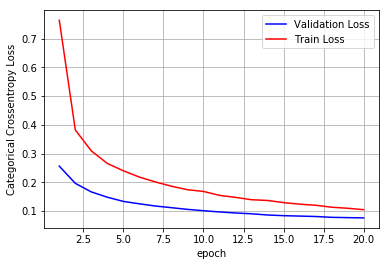

In [39]:
score = model5.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

The little value of dropout made the model to learn faster than the previous model and all the stats are good till the end.

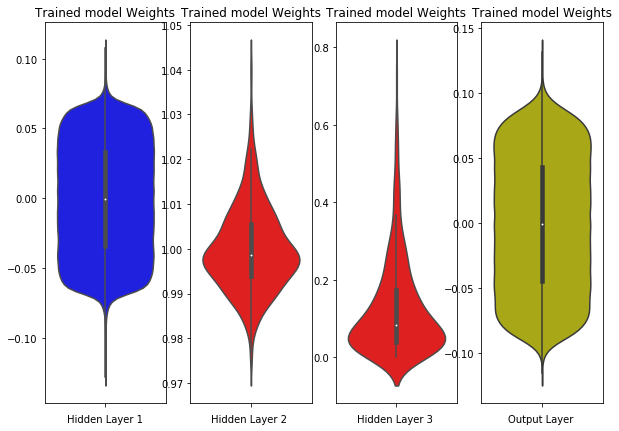

In [40]:
w_after = model5.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
h3_w = w_after[4].flatten().reshape(-1,1)
out_w = w_after[6].flatten().reshape(-1,1)


fig = plt.figure(figsize=(10,7))
plt.title("Weight matrices after model trained")
plt.subplot(1, 4, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 4, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 4, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h3_w, color='r')
plt.xlabel('Hidden Layer 3 ')

plt.subplot(1, 4, 4)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

**5.3 RELU ACTIVATION WITH BATCH NORM (Optimiser-SGD)**

In [0]:
from keras.layers.normalization import BatchNormalization
model5 = Sequential()

model5.add(Dense(512, input_dim=input_dim, activation='relu'))
model5.add(BatchNormalization())

model5.add(Dense(256, input_dim=input_dim, activation='relu'))
model5.add(BatchNormalization())

model5.add(Dense(128, input_dim=input_dim, activation='relu'))
model5.add(BatchNormalization())

model5.add(Dense(10, input_dim=input_dim, activation='softmax'))

In [42]:
model5.compile(optimizer='SGD', loss='categorical_crossentropy', metrics=['accuracy'])

history = model5.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 6s 108us/step - loss: 0.4255 - acc: 0.8754 - val_loss: 0.2161 - val_acc: 0.9380
Epoch 2/20
60000/60000 [==============================] - 5s 84us/step - loss: 0.1857 - acc: 0.9478 - val_loss: 0.1634 - val_acc: 0.9521
Epoch 3/20
60000/60000 [==============================] - 5s 86us/step - loss: 0.1367 - acc: 0.9627 - val_loss: 0.1384 - val_acc: 0.9593
Epoch 4/20
60000/60000 [==============================] - 5s 86us/step - loss: 0.1096 - acc: 0.9708 - val_loss: 0.1243 - val_acc: 0.9636
Epoch 5/20
60000/60000 [==============================] - 5s 89us/step - loss: 0.0915 - acc: 0.9758 - val_loss: 0.1153 - val_acc: 0.9649
Epoch 6/20
60000/60000 [==============================] - 5s 88us/step - loss: 0.0771 - acc: 0.9805 - val_loss: 0.1084 - val_acc: 0.9663
Epoch 7/20
60000/60000 [==============================] - 5s 87us/step - loss: 0.0652 - acc: 0.9842 - val_loss: 0.1027 - val_ac

In [43]:
model5.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_29 (Dense)             (None, 512)               401920    
_________________________________________________________________
batch_normalization_10 (Batc (None, 512)               2048      
_________________________________________________________________
dense_30 (Dense)             (None, 256)               131328    
_________________________________________________________________
batch_normalization_11 (Batc (None, 256)               1024      
_________________________________________________________________
dense_31 (Dense)             (None, 128)               32896     
_________________________________________________________________
batch_normalization_12 (Batc (None, 128)               512       
_________________________________________________________________
dense_32 (Dense)             (None, 10)               

Test score: 0.08236163575346582
Test accuracy: 0.9741


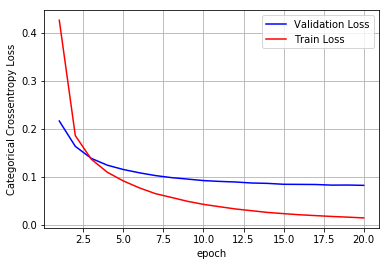

In [44]:
score = model5.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

The validation loss is little slow in decreasing.

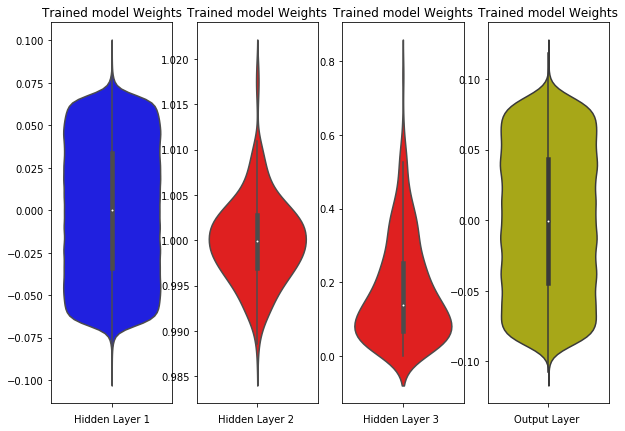

In [45]:
w_after = model5.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
h3_w = w_after[4].flatten().reshape(-1,1)
out_w = w_after[6].flatten().reshape(-1,1)


fig = plt.figure(figsize=(10,7))
plt.title("Weight matrices after model trained")
plt.subplot(1, 4, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 4, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 4, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h3_w, color='r')
plt.xlabel('Hidden Layer 3 ')

plt.subplot(1, 4, 4)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

**6.1 RELU ACTIVATION WITH DROPOUT VALUE 0.5 (Optimiser - Adamax)**

In [0]:
from keras.layers import Dropout
model5 = Sequential()
model5.add(Dense(512, input_dim=input_dim, activation='relu'))
model5.add(Dropout(0.5))
model5.add(Dense(256, input_dim=input_dim, activation='relu'))
model5.add(Dropout(0.5))
model5.add(Dense(128, input_dim=input_dim, activation='relu'))
model5.add(Dropout(0.5))
model5.add(Dense(10, input_dim=input_dim, activation='softmax'))

In [47]:
model5.compile(optimizer='Adamax', loss='categorical_crossentropy', metrics=['accuracy'])

history = model5.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 4s 74us/step - loss: 0.6029 - acc: 0.8106 - val_loss: 0.1855 - val_acc: 0.9462
Epoch 2/20
60000/60000 [==============================] - 3s 57us/step - loss: 0.2661 - acc: 0.9249 - val_loss: 0.1303 - val_acc: 0.9616
Epoch 3/20
60000/60000 [==============================] - 3s 56us/step - loss: 0.2040 - acc: 0.9435 - val_loss: 0.1082 - val_acc: 0.9684
Epoch 4/20
60000/60000 [==============================] - 3s 58us/step - loss: 0.1697 - acc: 0.9525 - val_loss: 0.1010 - val_acc: 0.9697
Epoch 5/20
60000/60000 [==============================] - 3s 56us/step - loss: 0.1498 - acc: 0.9588 - val_loss: 0.0895 - val_acc: 0.9731
Epoch 6/20
60000/60000 [==============================] - 3s 57us/step - loss: 0.1317 - acc: 0.9628 - val_loss: 0.0844 - val_acc: 0.9750
Epoch 7/20
60000/60000 [==============================] - 3s 57us/step - loss: 0.1191 - acc: 0.9661 - val_loss: 0.0801 - val_acc

In [48]:
model5.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_33 (Dense)             (None, 512)               401920    
_________________________________________________________________
dropout_19 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_34 (Dense)             (None, 256)               131328    
_________________________________________________________________
dropout_20 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_35 (Dense)             (None, 128)               32896     
_________________________________________________________________
dropout_21 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_36 (Dense)             (None, 10)               

Test score: 0.06598338727326336
Test accuracy: 0.9832


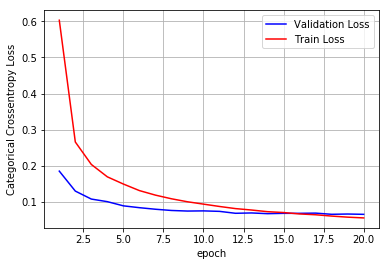

In [49]:
score = model5.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

Good stats seen all along the epochs.Overfitting at 15th epoch.

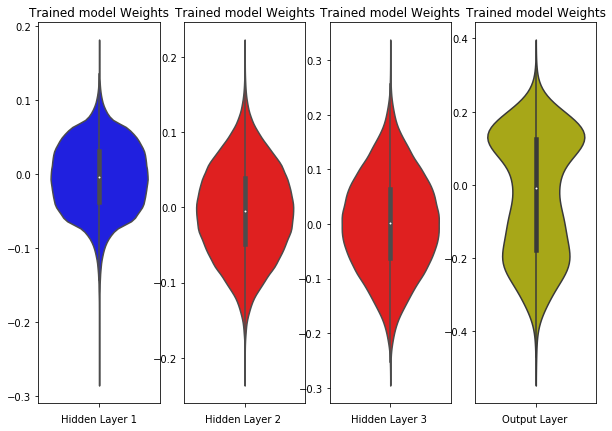

In [50]:
w_after = model5.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
h3_w = w_after[4].flatten().reshape(-1,1)
out_w = w_after[6].flatten().reshape(-1,1)


fig = plt.figure(figsize=(10,7))
plt.title("Weight matrices after model trained")
plt.subplot(1, 4, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 4, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 4, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h3_w, color='r')
plt.xlabel('Hidden Layer 3 ')

plt.subplot(1, 4, 4)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

**6.2 RELU ACTIVATION WITH BATCH NORM AND DROPOUT(0.3) Optimiser-(Adamax)**

In [0]:
from keras.layers.normalization import BatchNormalization
model6 = Sequential()

model6.add(Dense(512, input_dim=input_dim, activation='relu'))
model6.add(BatchNormalization())
model6.add(Dropout(0.3))

model6.add(Dense(256, input_dim=input_dim, activation='relu'))
model6.add(BatchNormalization())
model6.add(Dropout(0.3))

model6.add(Dense(128, input_dim=input_dim, activation='relu'))
model6.add(BatchNormalization())
model6.add(Dropout(0.3))

model6.add(Dense(10, input_dim=input_dim, activation='softmax'))

In [52]:
model6.compile(optimizer='Adamax', loss='categorical_crossentropy', metrics=['accuracy'])

history = model6.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 8s 130us/step - loss: 0.3441 - acc: 0.8962 - val_loss: 0.1332 - val_acc: 0.9567
Epoch 2/20
60000/60000 [==============================] - 6s 99us/step - loss: 0.1713 - acc: 0.9481 - val_loss: 0.0953 - val_acc: 0.9702
Epoch 3/20
60000/60000 [==============================] - 6s 100us/step - loss: 0.1265 - acc: 0.9623 - val_loss: 0.0868 - val_acc: 0.9726
Epoch 4/20
60000/60000 [==============================] - 6s 100us/step - loss: 0.1040 - acc: 0.9677 - val_loss: 0.0798 - val_acc: 0.9739
Epoch 5/20
60000/60000 [==============================] - 6s 100us/step - loss: 0.0876 - acc: 0.9735 - val_loss: 0.0689 - val_acc: 0.9787
Epoch 6/20
60000/60000 [==============================] - 6s 99us/step - loss: 0.0743 - acc: 0.9771 - val_loss: 0.0655 - val_acc: 0.9795
Epoch 7/20
60000/60000 [==============================] - 6s 100us/step - loss: 0.0653 - acc: 0.9792 - val_loss: 0.0637 - va

In [53]:
model6.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_37 (Dense)             (None, 512)               401920    
_________________________________________________________________
batch_normalization_13 (Batc (None, 512)               2048      
_________________________________________________________________
dropout_22 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_38 (Dense)             (None, 256)               131328    
_________________________________________________________________
batch_normalization_14 (Batc (None, 256)               1024      
_________________________________________________________________
dropout_23 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_39 (Dense)             (None, 128)             

Test score: 0.059768225400491794
Test accuracy: 0.9839


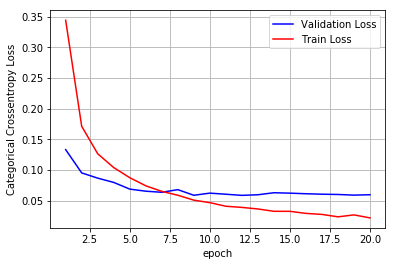

In [54]:
score = model6.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

The little value of dropout made the model to overfit at 7th epoch.But the stats are good till the end.

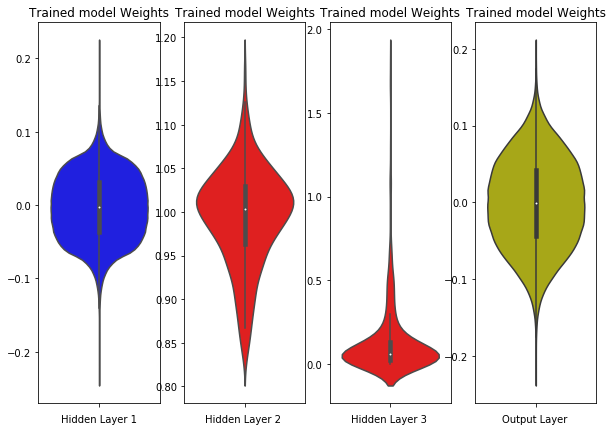

In [55]:
w_after = model6.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
h3_w = w_after[4].flatten().reshape(-1,1)
out_w = w_after[6].flatten().reshape(-1,1)


fig = plt.figure(figsize=(10,7))
plt.title("Weight matrices after model trained")
plt.subplot(1, 4, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 4, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 4, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h3_w, color='r')
plt.xlabel('Hidden Layer 3 ')

plt.subplot(1, 4, 4)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

**6.3 RELU ACTIVATION WITH BATCH NORM (Optimiser-Adamax)**

In [0]:
from keras.layers.normalization import BatchNormalization
model6 = Sequential()

model6.add(Dense(512, input_dim=input_dim, activation='relu'))
model6.add(BatchNormalization())

model6.add(Dense(256, input_dim=input_dim, activation='relu'))
model6.add(BatchNormalization())

model6.add(Dense(128, input_dim=input_dim, activation='relu'))
model6.add(BatchNormalization())

model6.add(Dense(10, input_dim=input_dim, activation='softmax'))

In [57]:
model6.compile(optimizer='Adamax', loss='categorical_crossentropy', metrics=['accuracy'])

history = model6.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 8s 128us/step - loss: 0.1790 - acc: 0.9464 - val_loss: 0.0975 - val_acc: 0.9699
Epoch 2/20
60000/60000 [==============================] - 6s 100us/step - loss: 0.0691 - acc: 0.9797 - val_loss: 0.0835 - val_acc: 0.9722
Epoch 3/20
60000/60000 [==============================] - 6s 98us/step - loss: 0.0420 - acc: 0.9873 - val_loss: 0.0815 - val_acc: 0.9735
Epoch 4/20
60000/60000 [==============================] - 6s 97us/step - loss: 0.0276 - acc: 0.9918 - val_loss: 0.0720 - val_acc: 0.9775
Epoch 5/20
60000/60000 [==============================] - 6s 97us/step - loss: 0.0171 - acc: 0.9949 - val_loss: 0.0656 - val_acc: 0.9791
Epoch 6/20
60000/60000 [==============================] - 6s 99us/step - loss: 0.0122 - acc: 0.9964 - val_loss: 0.0793 - val_acc: 0.9768
Epoch 7/20
60000/60000 [==============================] - 6s 98us/step - loss: 0.0109 - acc: 0.9966 - val_loss: 0.0704 - val_a

In [58]:
model6.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_41 (Dense)             (None, 512)               401920    
_________________________________________________________________
batch_normalization_16 (Batc (None, 512)               2048      
_________________________________________________________________
dense_42 (Dense)             (None, 256)               131328    
_________________________________________________________________
batch_normalization_17 (Batc (None, 256)               1024      
_________________________________________________________________
dense_43 (Dense)             (None, 128)               32896     
_________________________________________________________________
batch_normalization_18 (Batc (None, 128)               512       
_________________________________________________________________
dense_44 (Dense)             (None, 10)              

Test score: 0.0755472852376839
Test accuracy: 0.9828


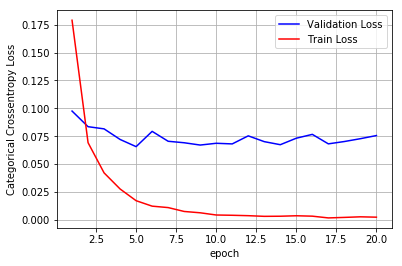

In [59]:
score = model6.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

Overfitting has seen in the earlier epochs.

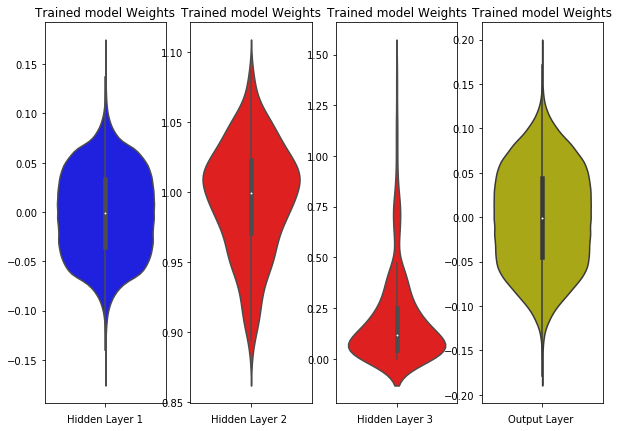

In [60]:
w_after = model6.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
h3_w = w_after[4].flatten().reshape(-1,1)
out_w = w_after[6].flatten().reshape(-1,1)


fig = plt.figure(figsize=(10,7))
plt.title("Weight matrices after model trained")
plt.subplot(1, 4, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 4, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 4, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h3_w, color='r')
plt.xlabel('Hidden Layer 3 ')

plt.subplot(1, 4, 4)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

In [0]:
from prettytable import PrettyTable
F='Not present'
T='Present'
Model = ["2","2","2","2","2","3","3","3","3","5","5","5","5"]
test_scr=[0.08,0.09,0.06,0.08,0.06,0.108,0.06,0.07,0.05,0.08,0.07,0.10,0.06]
test_acc=[0.98,0.98,0.98,0.97,0.98,0.97,0.98,0.98,0.98,0.98,0.98,0.97,0.98]
d=[F,F,T,F,T,F,T,F,T,F,T,F,T]
b=[F,F,F,T,T,F,F,T,T,F,F,T,T]
sno =[1,2,3,4,5,6,7,8,9,10,11,12,13]
table = PrettyTable()
table.add_column('S-NO',sno)
table.add_column("Layers",Model)
table.add_column("Test Loss",test_scr)
table.add_column("Test Acuracy",test_acc)
table.add_column("Dropout Present",d)
table.add_column("Batch Norm Present",b)

In [0]:
print(table)
print('Dropout is 0.5 in all models')

+------+--------+-----------+--------------+-----------------+--------------------+
| S-NO | Layers | Test Loss | Test Acuracy | Dropout Present | Batch Norm Present |
+------+--------+-----------+--------------+-----------------+--------------------+
|  1   |   2    |    0.08   |     0.98     |   Not present   |    Not present     |
|  2   |   2    |    0.09   |     0.98     |   Not present   |    Not present     |
|  3   |   2    |    0.06   |     0.98     |     Present     |    Not present     |
|  4   |   2    |    0.08   |     0.97     |   Not present   |      Present       |
|  5   |   2    |    0.06   |     0.98     |     Present     |      Present       |
|  6   |   3    |   0.108   |     0.97     |   Not present   |    Not present     |
|  7   |   3    |    0.06   |     0.98     |     Present     |    Not present     |
|  8   |   3    |    0.07   |     0.98     |   Not present   |      Present       |
|  9   |   3    |    0.05   |     0.98     |     Present     |      Present 

In [0]:
from prettytable import PrettyTable
F='Not present'
T='Present'
T5='Present (Value=0.5)'
T3='Present (Value=0.3)'
T4='Present (Value=0.4)'
Optimiser = ["RMSprop","RMSprop","RMSprop","SGD","SGD","SGD","Adamax","Adamax","Adamax"]
test_scr=[0.114,0.05,0.103,0.135,0.07,0.082,0.065,0.059,0.075]
test_acc=[0.979,0.985,0.979,0.959,0.976,0.974,0.983,0.983,0.982]
d=[T5,T3,F,T4,T3,F,T5,T3,F]
b=[F,T,T,F,T,T,F,T,T]
sno =[1,2,3,4,5,6,7,8,9]
table = PrettyTable()
table.add_column('S-NO',sno)
table.add_column("Optimizer",Optimiser)
table.add_column("Test Loss",test_scr)
table.add_column("Test Acuracy",test_acc)
table.add_column("Dropout Present",d)
table.add_column("Batch Norm Present",b)

In [62]:
print('Pretty table of models with different optimizers other than ADAM')
print(table)

Pretty table of models with different optimizers other than ADAM
+------+-----------+-----------+--------------+---------------------+--------------------+
| S-NO | Optimizer | Test Loss | Test Acuracy |   Dropout Present   | Batch Norm Present |
+------+-----------+-----------+--------------+---------------------+--------------------+
|  1   |  RMSprop  |   0.114   |    0.979     | Present (Value=0.5) |    Not present     |
|  2   |  RMSprop  |    0.05   |    0.985     | Present (Value=0.3) |      Present       |
|  3   |  RMSprop  |   0.103   |    0.979     |     Not present     |      Present       |
|  4   |    SGD    |   0.135   |    0.959     | Present (Value=0.4) |    Not present     |
|  5   |    SGD    |    0.07   |    0.976     | Present (Value=0.3) |      Present       |
|  6   |    SGD    |   0.082   |    0.974     |     Not present     |      Present       |
|  7   |   Adamax  |   0.065   |    0.983     | Present (Value=0.5) |    Not present     |
|  8   |   Adamax  |   0.

Models with RMSprop and Adamax as their optimizers gave better Test Accuracy.

# Conclusions

**1. Naive models (without dropout or batch norm) failed as they ended up in overfitting and higher validation loss.**

**2. Dropout has clearly played a vital role in minimising the validation loss to as low as training loss after the last epoch.**

**3. Models with Batch normalisation with no dropout failed in having a lower validation loss.**

**4. Droput with batch norm models were also good.**

**5. Models with RMSprop optimiser gave splendid results than all other models.**

**6. SGD optimiser models started with low accuracy and higher loss values but in the end they delivered better results. If they ran for 25 - 30 epochs ,they may achieve similar stats of best models mentioned here.**